# Objective:
#### To detect whether a person is having Chronic Kidney Disease(CKD) or not, based on below feature values obtained from lab test.
1) Age(numerical) - age in years  
2) Blood Pressure(numerical) - bp in mm/Hg  
3) Specific Gravity(nominal) - sg - (1.005,1.010,1.015,1.020,1.025)  
4) Albumin(nominal) - al - (0,1,2,3,4,5)  
5) Sugar(nominal) - su - (0,1,2,3,4,5)  
6) Red Blood Cells(nominal) - rbc - (normal,abnormal)  
7) Pus Cell (nominal) - pc - (normal,abnormal)  
8) Pus Cell clumps(nominal) - pcc - (present,notpresent)  
9) Bacteria(nominal) - ba - (present,notpresent)  
10) Blood Glucose Random(numerical) - bgr in mgs/dl  
11) Blood Urea(numerical) -bu in mgs/dl  
12) Serum Creatinine(numerical) - sc in mgs/dl  
13) Sodium(numerical) - sod in mEq/L  
14) Potassium(numerical) - pot in mEq/L  
15) Hemoglobin(numerical) - hemo in gms  
16) Packed Cell Volume(numerical)  
17) White Blood Cell Count(numerical) - wc in cells/cumm  
18) Red Blood Cell Count(numerical) - rc in millions/cmm  
19) Hypertension(nominal) - htn - (yes,no)  
20) Diabetes Mellitus(nominal) - dm - (yes,no)  
21) Coronary Artery Disease(nominal) - cad - (yes,no)  
22) Appetite(nominal) - appet - (good,poor)  
23) Pedal Edema(nominal) - pe - (yes,no)  
24) Anemia(nominal) - ane - (yes,no)  
25) Class (nominal)- class - (ckd,notckd)  

# Importing Libraries:

In [121]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score,auc,classification_report,confusion_matrix,f1_score,log_loss,hinge_loss
import warnings
warnings.filterwarnings('ignore')

# Reading Data:

In [2]:
df = pd.read_csv('G:/Chronic Kidney Disease classification/kidney_disease.csv')
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [3]:
df = df.drop(columns='id')
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [5]:
def missingvalueratio(df):
    nullvalues = df.isnull().sum()
    percent = nullvalues/len(df)*100
    mvr_df = pd.DataFrame({'Missing Values':nullvalues, 'Percentage':percent})
    return mvr_df

In [6]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [7]:
missingvalueratio(df)

,Missing Values,Percentage
age,9,2.25
bp,12,3.00
sg,47,11.75
al,46,11.50
su,49,12.25
rbc,152,38.00
pc,65,16.25
pcc,4,1.00
ba,4,1.00
bgr,44,11.00


In [8]:
gcol = df[['pcv','rc','wc']]
for i in gcol:
    df[i].replace(to_replace='\t?',value=np.nan,inplace=True)

In [9]:
for i in gcol:
    df[i] = df[i].astype('float64')

In [10]:
df['classification'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [11]:
df['classification'].replace(to_replace='ckd\t', value='ckd', inplace=True)

In [12]:
df['classification'].value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

In [13]:
def imbalance():
    count = df['classification'].value_counts()
    percent = count/len(df)*100
    imb_df = pd.DataFrame({'Count': count,'Percentage':percent})
    return imb_df

In [14]:
imbalance()

,Count,Percentage
ckd,250,62.5
notckd,150,37.5


In [15]:
df.duplicated().sum()

0

# Exploratory Data Analysis (EDA):

## Univariate analysis:

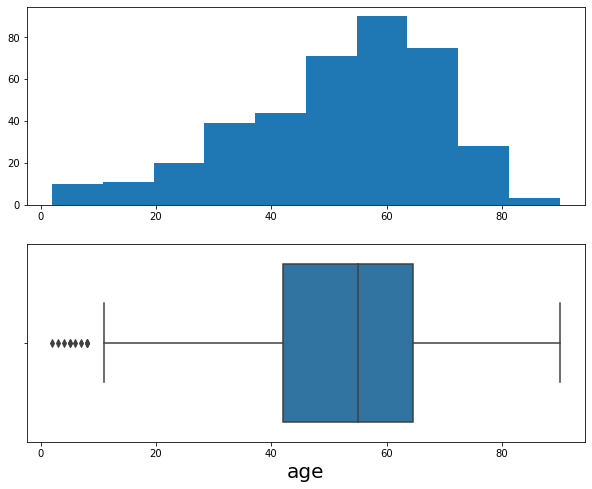

In [16]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.hist(df['age'], bins=10);
plt.subplot(2, 1, 2)
plt.xlabel('',size=20)
sns.boxplot(x='age', data=df);

In [17]:
df['age'].describe()

count    391.000000
mean      51.483376
std       17.169714
min        2.000000
25%       42.000000
50%       55.000000
75%       64.500000
max       90.000000
Name: age, dtype: float64

In [18]:
q1 = df['age'].quantile(q=0.25)
q3 = df['age'].quantile(q=0.75)
iqr = q3-q1
upperlimit = q3+(1.5*iqr)
lowerlimit = q1-(1.5*iqr)

In [19]:
df[df['age']<lowerlimit]

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
75,5.0,NaN,1.015,1.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,NaN,NaN,NaN,no,no,no,good,no,yes,ckd
131,5.0,50.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,36.0,12400.0,NaN,no,no,no,good,no,no,ckd
150,8.0,60.0,1.025,3.0,0.0,normal,normal,notpresent,notpresent,78.0,...,41.0,6700.0,NaN,no,no,no,poor,yes,no,ckd
185,4.0,NaN,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,99.0,...,34.0,NaN,NaN,no,no,no,good,no,no,ckd
186,8.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,NaN,...,NaN,NaN,NaN,no,no,no,good,yes,no,ckd
187,3.0,NaN,1.010,2.0,0.0,normal,normal,notpresent,notpresent,NaN,...,34.0,12300.0,NaN,no,no,no,good,no,no,ckd
188,8.0,NaN,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,80.0,...,38.0,NaN,NaN,no,\tno,no,good,no,no,ckd
190,6.0,60.0,1.010,4.0,0.0,abnormal,abnormal,notpresent,present,94.0,...,30.0,16700.0,4.8,no,no,no,poor,no,no,ckd
215,2.0,NaN,1.010,3.0,0.0,normal,abnormal,notpresent,notpresent,NaN,...,NaN,NaN,NaN,no,no,no,good,yes,no,ckd


In [20]:
df['age'] = np.where(df['age']<lowerlimit,lowerlimit,np.where(df['age']>upperlimit,upperlimit,df['age']))

In [21]:
df['age'].describe()

count    391.000000
mean      51.551151
std       16.989126
min        8.250000
25%       42.000000
50%       55.000000
75%       64.500000
max       90.000000
Name: age, dtype: float64

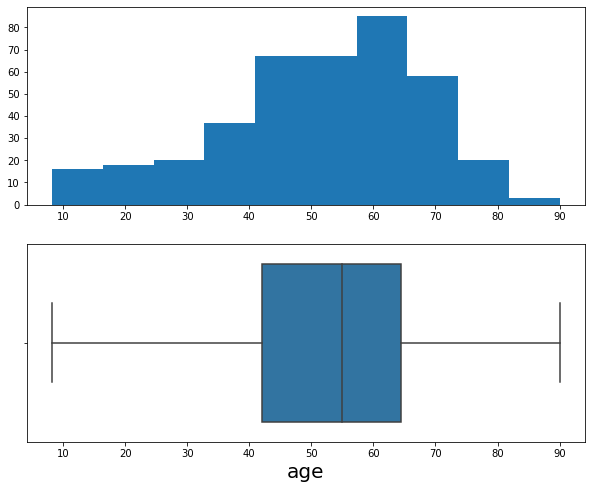

In [22]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.hist(df['age'], bins=10);
plt.subplot(2, 1, 2)
plt.xlabel('',size=20)
sns.boxplot(x='age', data=df);

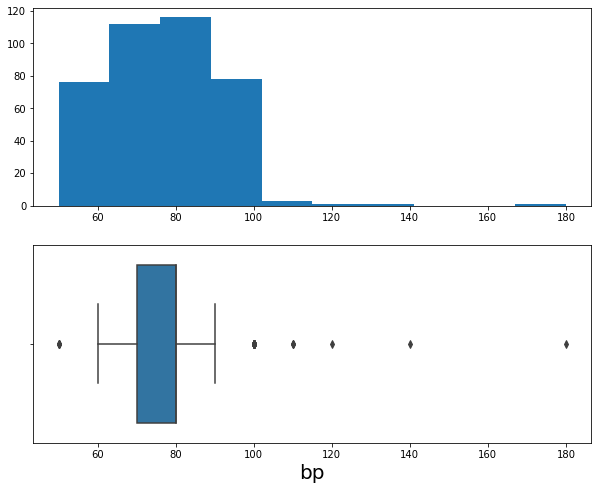

In [23]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.hist(df['bp'], bins=10);
plt.subplot(2, 1, 2)
plt.xlabel('',size=20)
sns.boxplot(x='bp', data=df);

In [24]:
bpq1 = df['bp'].quantile(q=0.25)
bpq3 = df['bp'].quantile(q=0.75)
bpiqr = bpq3-bpq1
bpupperlimit = bpq3+(1.5*bpiqr)
bplowerlimit = bpq1-(1.5*bpiqr)
df['bp'] = np.where(df['bp']<bplowerlimit,bplowerlimit,np.where(df['bp']>bpupperlimit,bpupperlimit,df['bp']))

In [25]:
df['bp'].value_counts()

80.0    116
70.0    112
60.0     71
90.0     53
95.0     31
55.0      5
Name: bp, dtype: int64

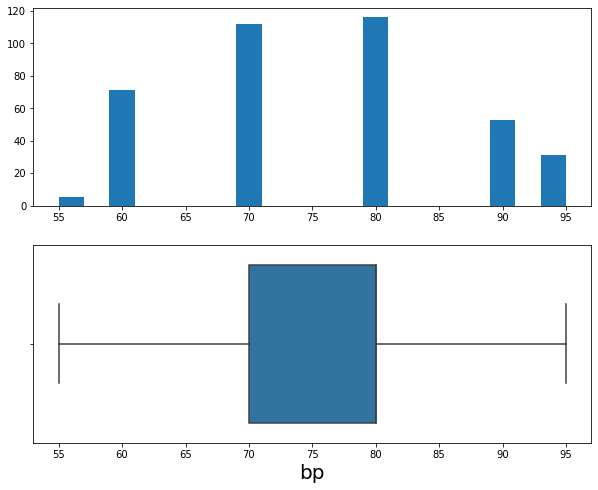

In [26]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.hist(df['bp'], bins=20);
plt.subplot(2, 1, 2)
plt.xlabel('',size=20)
sns.boxplot(x='bp', data=df);

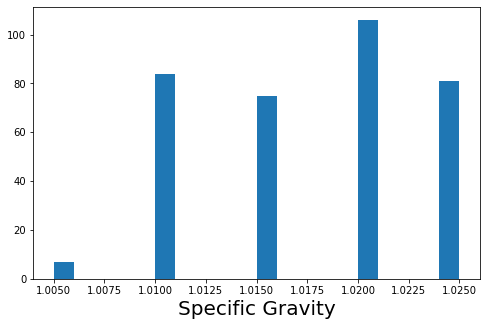

In [27]:
fig,ax = plt.subplots(figsize=(8,5))
plt.hist(df['sg'], bins=20)
plt.xlabel('Specific Gravity',size=20)
plt.show()

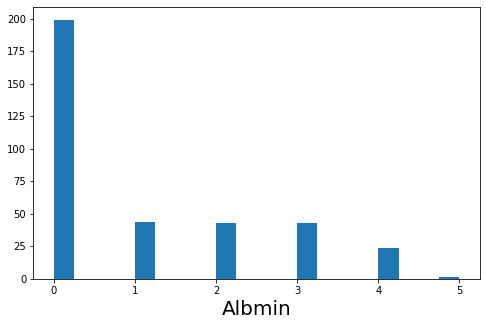

In [28]:
fig,ax = plt.subplots(figsize=(8,5))
plt.hist(df['al'],bins= 20)
plt.xlabel('Albmin',size=20)
plt.show()

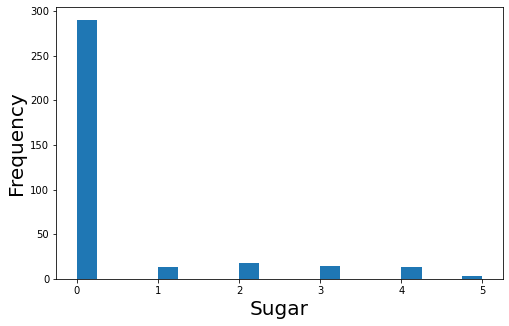

In [29]:
fig,ax = plt.subplots(figsize=(8,5))
plt.hist(df['su'],bins=20)
plt.xlabel('Sugar',size=20)
plt.ylabel('Frequency',size=20)
plt.show()

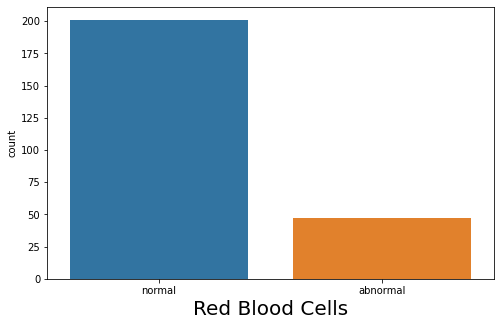

In [30]:
fig,ax = plt.subplots(figsize=(8,5))
sns.countplot(df['rbc']);
plt.xlabel('Red Blood Cells',size=20)
plt.show()

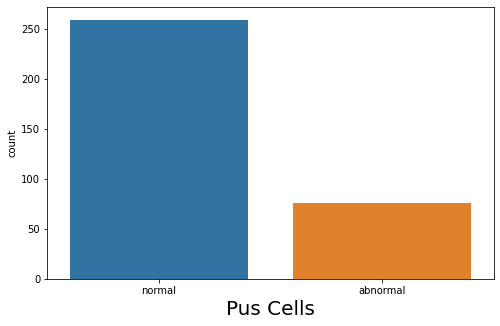

In [31]:
fig,ax = plt.subplots(figsize=(8,5))
sns.countplot(df['pc'])
plt.xlabel('Pus Cells',size=20)
plt.show()

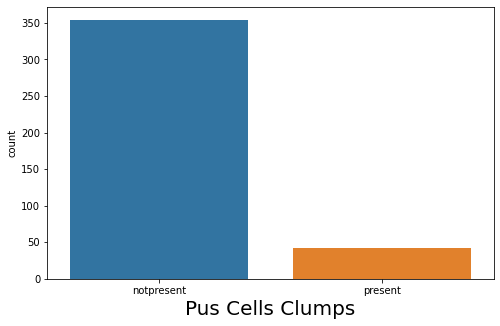

In [32]:
fig,ax = plt.subplots(figsize=(8,5))
sns.countplot(df['pcc'])
plt.xlabel('Pus Cells Clumps',size=20)
plt.show()

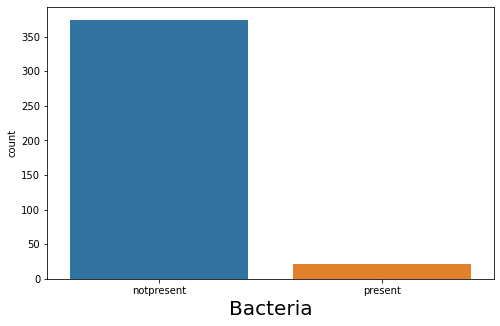

In [33]:
fig,ax = plt.subplots(figsize=(8,5))
sns.countplot(df['ba'])
plt.xlabel('Bacteria',size=20)
plt.show()

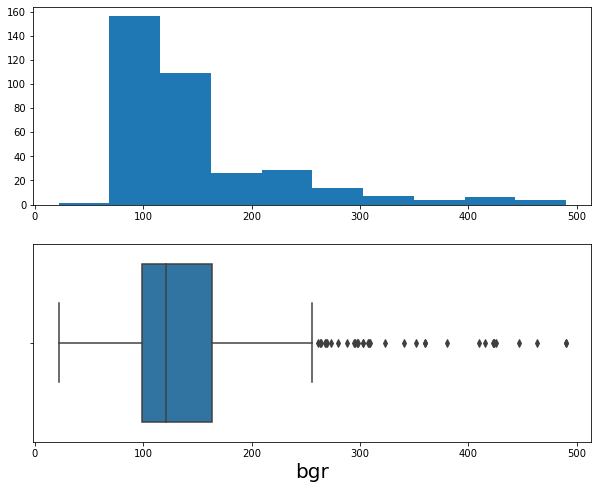

In [34]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.hist(df['bgr'])
plt.subplot(2,1,2)
plt.xlabel('',size=20)
sns.boxplot(x='bgr', data=df)
plt.show()

In [35]:
bgrq1 = df['bgr'].quantile(0.25)
bgrq3 = df['bgr'].quantile(0.75)
bgriqr = bgrq3-bgrq1
bgrlowerlimit = bgrq1-(1.5*bgriqr)
bgrupperlimit = bgrq3+(1.5*bgriqr)
df['bgr'] = np.where(df['bgr']<bgrlowerlimit,bgrlowerlimit,np.where(df['bgr']>bgrupperlimit,bgrupperlimit,df['bgr']))

In [36]:
bgrdf = df[df['bgr']>bgrq3]
bgrdf

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,259.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,259.0,...,44.0,6900.0,5.0,no,yes,no,good,yes,no,ckd
10,50.0,60.0,1.010,2.0,4.0,NaN,abnormal,present,notpresent,259.0,...,28.0,NaN,NaN,yes,yes,no,good,no,yes,ckd
11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,259.0,...,32.0,4500.0,3.8,yes,yes,no,poor,yes,no,ckd
12,68.0,70.0,1.015,3.0,1.0,NaN,normal,present,notpresent,208.0,...,28.0,12200.0,3.4,yes,yes,yes,poor,yes,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,69.0,70.0,1.010,4.0,3.0,normal,abnormal,present,present,214.0,...,28.0,11500.0,3.3,yes,yes,yes,good,yes,yes,ckd
243,62.0,90.0,1.020,2.0,1.0,NaN,normal,notpresent,notpresent,169.0,...,47.0,11000.0,6.1,yes,no,no,good,no,no,ckd
244,64.0,90.0,1.015,3.0,2.0,NaN,abnormal,present,notpresent,259.0,...,40.0,9800.0,4.6,yes,yes,no,good,no,yes,ckd
248,59.0,70.0,1.010,1.0,3.0,abnormal,abnormal,notpresent,notpresent,259.0,...,37.0,10200.0,4.1,yes,yes,yes,good,no,no,ckd


In [37]:
bgrdf['classification'].value_counts()

ckd    88
Name: classification, dtype: int64

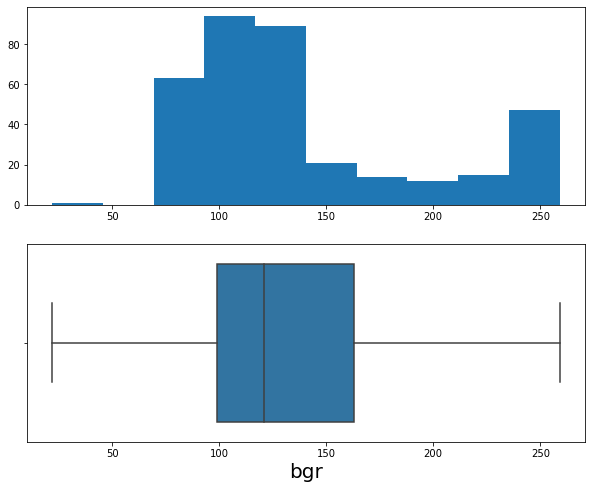

In [38]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.hist(df['bgr'])
plt.subplot(2,1,2)
plt.xlabel('',size=20)
sns.boxplot(x='bgr', data=df)
plt.show()

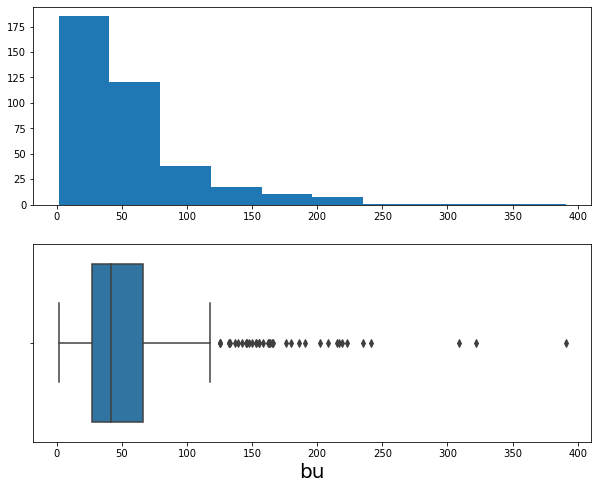

In [39]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.hist(df['bu'])
plt.subplot(2,1,2)
plt.xlabel('',size=20)
sns.boxplot(x='bu', data=df)
plt.show()

In [40]:
buq1 = df['bu'].quantile(0.25)
buq3 = df['bu'].quantile(0.75)
buiqr = buq3-buq1
bulowerlimit = buq1-(1.5*buiqr)
buupperlimit = buq3+(1.5*buiqr)
df['bu'] = np.where(df['bu']<bulowerlimit,bulowerlimit,np.where(df['bu']>buupperlimit,buupperlimit,df['bu']))

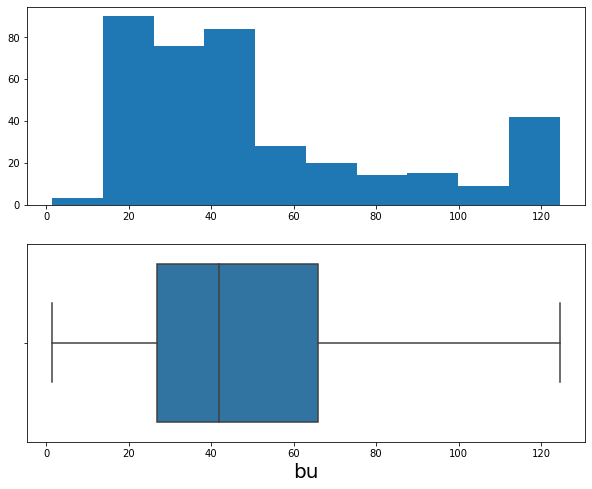

In [41]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.hist(df['bu'])
plt.subplot(2,1,2)
plt.xlabel('',size=20)
sns.boxplot(x='bu', data=df)
plt.show()

In [42]:
budf = df[df['bu']>buq3]
budf

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,ckd
12,68.0,70.0,1.015,3.0,1.0,NaN,normal,present,notpresent,208.0,...,28.0,12200.0,3.4,yes,yes,yes,poor,yes,no,ckd
13,68.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,98.0,...,NaN,NaN,NaN,yes,yes,yes,poor,yes,no,ckd
14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,16.0,11000.0,2.6,yes,yes,yes,poor,yes,no,ckd
15,40.0,80.0,1.015,3.0,0.0,NaN,normal,notpresent,notpresent,76.0,...,24.0,3800.0,2.8,yes,no,no,good,no,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,72.0,95.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,201.0,...,28.0,NaN,NaN,yes,yes,no,good,no,yes,ckd
242,69.0,70.0,1.010,4.0,3.0,normal,abnormal,present,present,214.0,...,28.0,11500.0,3.3,yes,yes,yes,good,yes,yes,ckd
245,48.0,95.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,103.0,...,19.0,7200.0,2.6,yes,no,yes,poor,no,no,ckd
246,48.0,95.0,1.015,3.0,0.0,abnormal,normal,present,notpresent,106.0,...,26.0,5000.0,2.5,yes,no,yes,good,no,yes,ckd


In [43]:
budf['classification'].value_counts()

ckd    93
Name: classification, dtype: int64

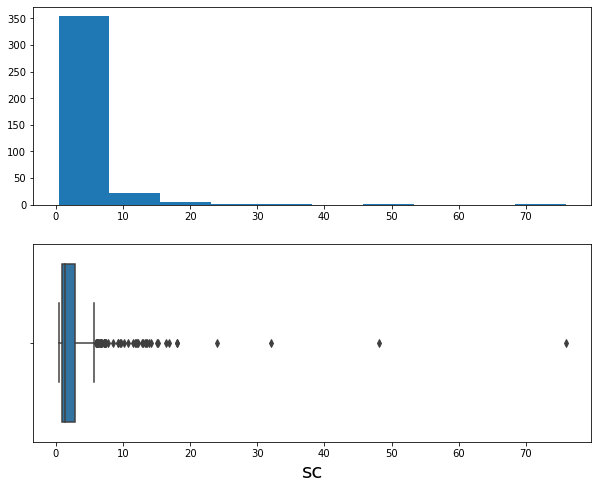

In [44]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.hist(df['sc'])
plt.subplot(2,1,2)
plt.xlabel('',size=20)
sns.boxplot(x='sc', data=df)
plt.show()

In [45]:
scq1 = df['sc'].quantile(0.25)
scq3 = df['sc'].quantile(0.75)
sciqr = scq3-scq1
sclowerlimit = scq1-(1.5*sciqr)
scupperlimit = scq3+(1.5*sciqr)
df['sc'] = np.where(df['sc']<sclowerlimit,sclowerlimit,np.where(df['sc']>scupperlimit,scupperlimit,df['sc']))

In [46]:
scdf = df[df['sc']>scq3]
scdf['classification'].value_counts()

ckd    93
Name: classification, dtype: int64

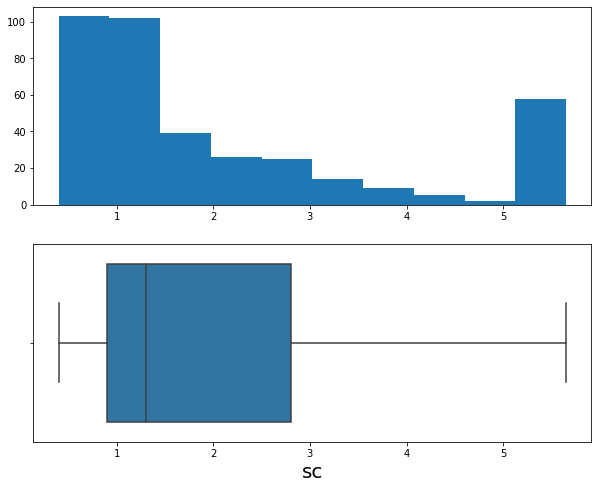

In [47]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.hist(df['sc'])
plt.subplot(2,1,2)
plt.xlabel('',size=20)
sns.boxplot(x='sc', data=df)
plt.show()

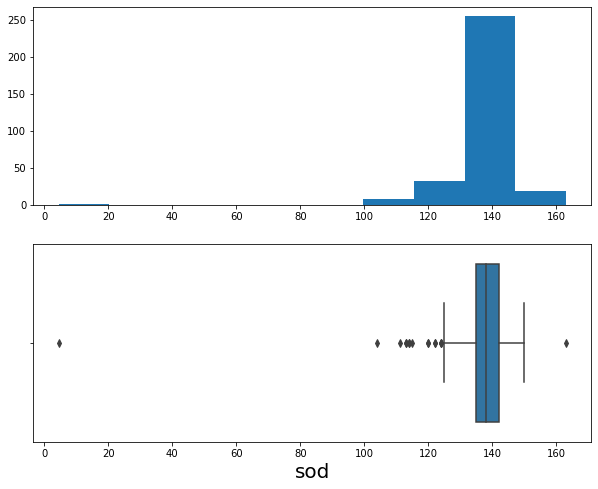

In [48]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.hist(df['sod'])
plt.subplot(2,1,2)
plt.xlabel('',size=20)
sns.boxplot(x='sod', data=df)
plt.show()

In [49]:
sodq1 = df['sod'].quantile(0.25)
sodq3 = df['sod'].quantile(0.75)
sodiqr = sodq3-sodq1
sodlowerlimit = sodq1-(1.5*sodiqr)
sodupperlimit = sodq3+(1.5*sodiqr)
df['sod'] = np.where(df['sod']<sodlowerlimit,sodlowerlimit,df['sod'])

In [50]:
soddf = df[df['sod']>sodupperlimit]
soddf

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
61,67.0,80.0,1.01,1.0,3.0,normal,abnormal,notpresent,notpresent,182.0,...,NaN,NaN,NaN,no,no,no,good,yes,no,ckd


In [51]:
df.drop([61],inplace=True)

In [52]:
df.reset_index(drop=True)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.00,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,8.25,55.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.00,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,259.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.00,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.00,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,55.00,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
395,42.00,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
396,12.00,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
397,17.00,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


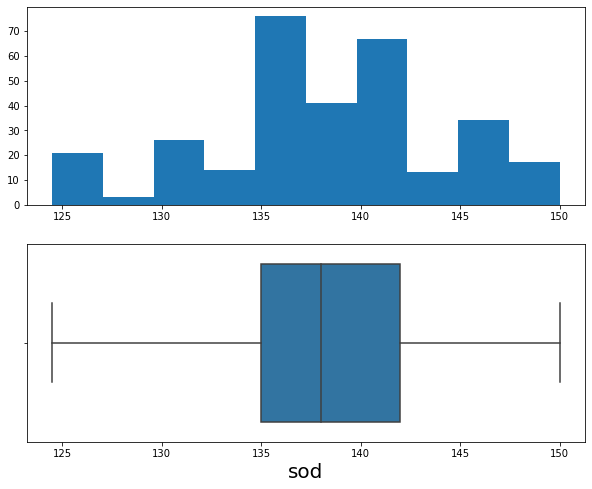

In [53]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.hist(df['sod'])
plt.subplot(2,1,2)
plt.xlabel('',size=20)
sns.boxplot(x='sod', data=df)
plt.show()

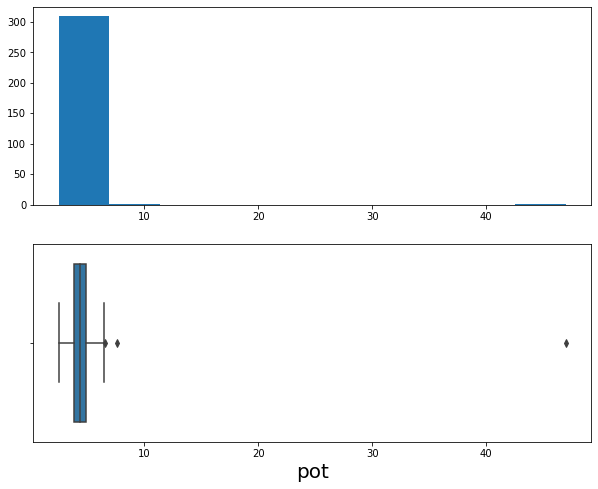

In [54]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.hist(df['pot'])
plt.subplot(2,1,2)
plt.xlabel('',size=20)
sns.boxplot(x='pot', data=df)
plt.show()

In [55]:
potq1 = df['pot'].quantile(0.25)
potq3 = df['pot'].quantile(0.75)
potiqr = potq3-potq1
potupperlimit = potq3+(1.5*potiqr)
df['pot'] = np.where(df['pot']>potupperlimit,potupperlimit,df['pot'])

In [56]:
df['pot'].value_counts()

5.00    30
3.50    30
4.90    27
4.70    17
4.80    16
4.20    14
4.10    14
4.00    14
4.40    14
3.90    14
3.80    14
4.50    13
4.30    12
3.70    12
3.60     8
4.60     7
3.40     5
5.20     5
5.70     4
5.30     4
6.55     3
5.50     3
5.40     3
3.20     3
3.30     3
2.90     3
6.30     3
5.60     2
5.80     2
6.50     2
3.00     2
5.90     2
2.50     2
5.10     1
2.80     1
2.70     1
6.40     1
Name: pot, dtype: int64

In [57]:
df[df['pot']>6.5]

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
60,67.0,90.0,1.020,1.0,0.0,NaN,abnormal,present,notpresent,141.0,...,NaN,NaN,NaN,yes,no,no,good,no,no,ckd
84,59.0,70.0,1.010,3.0,0.0,normal,abnormal,notpresent,notpresent,76.0,...,22.0,3800.0,2.1,yes,no,no,poor,yes,yes,ckd
128,52.0,90.0,1.015,4.0,3.0,normal,abnormal,notpresent,notpresent,224.0,...,23.0,5000.0,2.9,yes,yes,no,good,no,yes,ckd


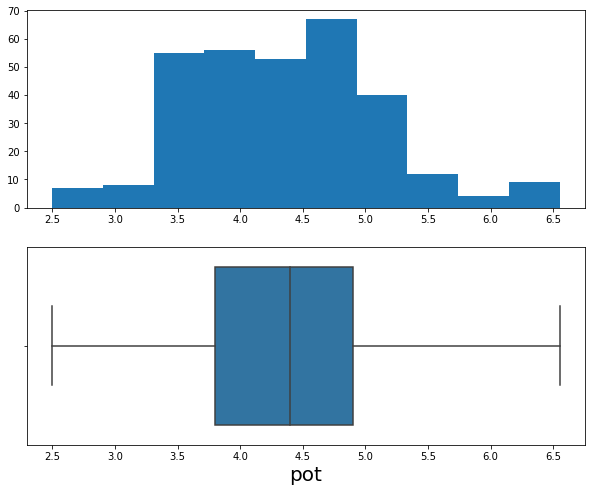

In [58]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.hist(df['pot'])
plt.subplot(2,1,2)
plt.xlabel('',size=20)
sns.boxplot(x='pot', data=df)
plt.show()

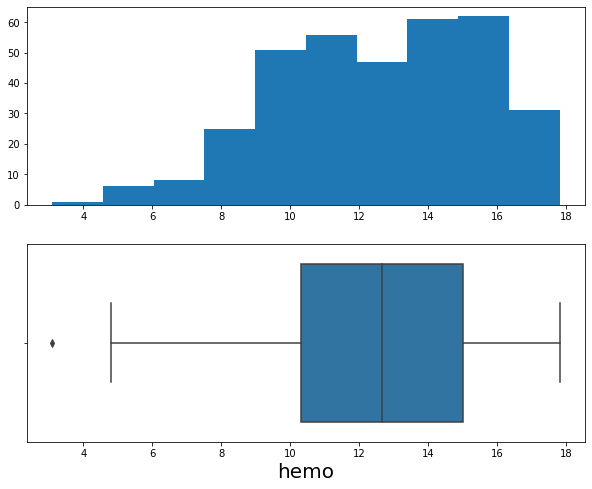

In [59]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.hist(df['hemo'])
plt.subplot(2,1,2)
plt.xlabel('',size=20)
sns.boxplot(x='hemo', data=df)
plt.show()

In [60]:
hemoq1 = df['hemo'].quantile(0.25)
hemoq3 = df['hemo'].quantile(0.75)
hemoiqr = hemoq3-hemoq1
hemolowerlimit = hemoq1-(1.5*hemoiqr)
hemoupperlimit = hemoq3+(1.5*hemoiqr)
df['hemo'] = np.where(df['hemo']<hemolowerlimit,hemolowerlimit,np.where(df['hemo']>hemoupperlimit,hemoupperlimit,df['hemo']))

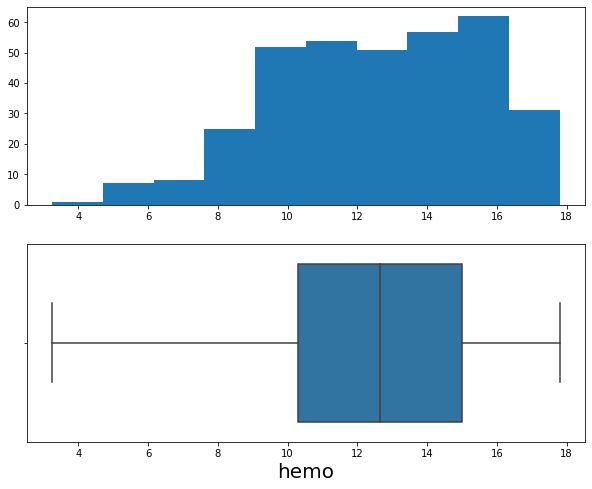

In [61]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.hist(df['hemo'])
plt.subplot(2,1,2)
plt.xlabel('',size=20)
sns.boxplot(x='hemo', data=df)
plt.show()

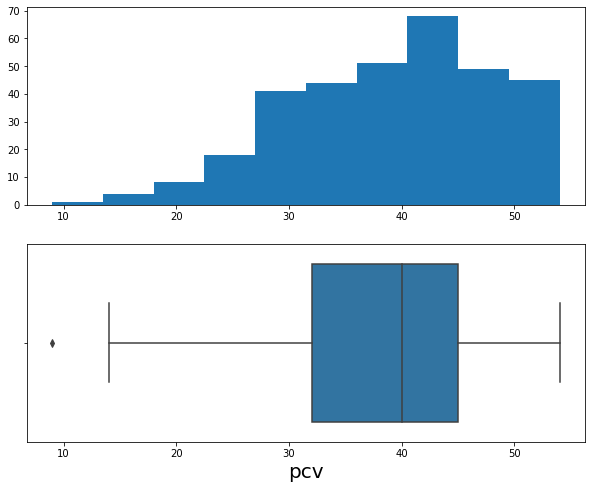

In [62]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.hist(df['pcv'])
plt.subplot(2,1,2)
plt.xlabel('',size=20)
sns.boxplot(x='pcv', data=df)
plt.show()

In [63]:
pcvq1 = df['pcv'].quantile(0.25)
pcvq3 = df['pcv'].quantile(0.75)
pcviqr = pcvq3-pcvq1
pcvlowerlimit = pcvq1-(1.5*pcviqr)
pcvupperlimit = pcvq3+(1.5*pcviqr)
df['pcv'] = np.where(df['pcv']<pcvlowerlimit,pcvlowerlimit,np.where(df['pcv']>pcvupperlimit,pcvupperlimit,df['pcv']))

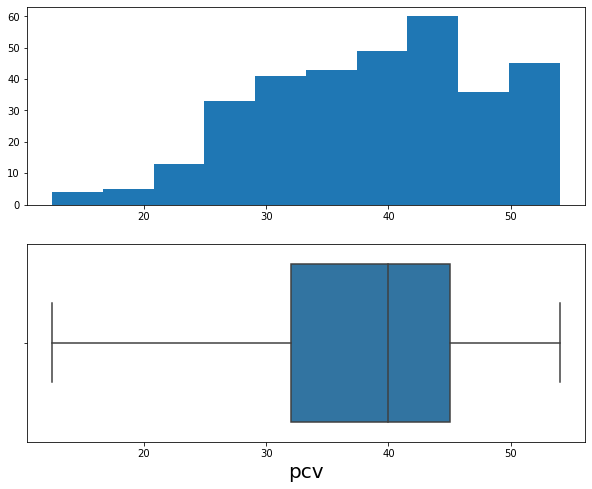

In [64]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.hist(df['pcv'])
plt.subplot(2,1,2)
plt.xlabel('',size=20)
sns.boxplot(x='pcv', data=df)
plt.show()

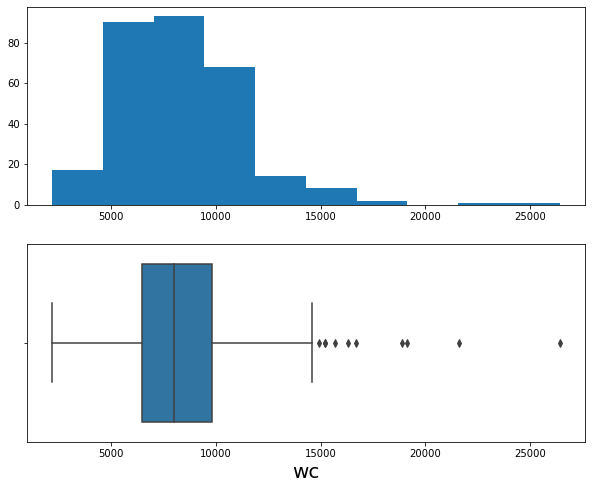

In [65]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.hist(df['wc'])
plt.subplot(2,1,2)
plt.xlabel('',size=20)
sns.boxplot(x='wc', data=df)
plt.show()

In [66]:
wcq1 = df['wc'].quantile(0.25)
wcq3 = df['wc'].quantile(0.75)
wciqr = wcq3-wcq1
wclowerlimit = wcq1-(1.5*wciqr)
wcupperlimit = wcq3+(1.5*wciqr)
df['wc'] = np.where(df['wc']<wclowerlimit,wclowerlimit,np.where(df['wc']>wcupperlimit,wcupperlimit,df['wc']))

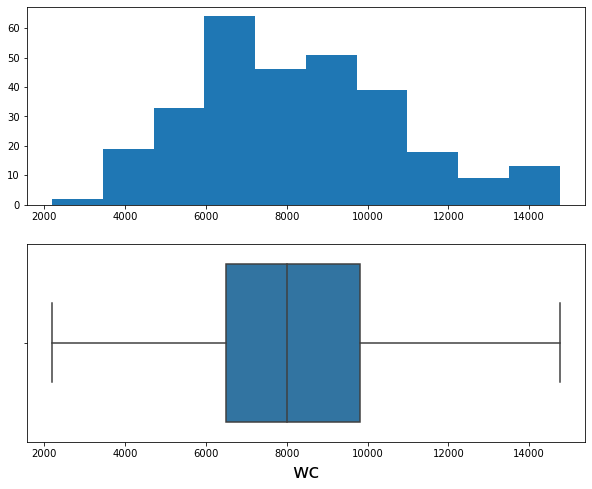

In [67]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.hist(df['wc'])
plt.subplot(2,1,2)
plt.xlabel('',size=20)
sns.boxplot(x='wc', data=df)
plt.show()

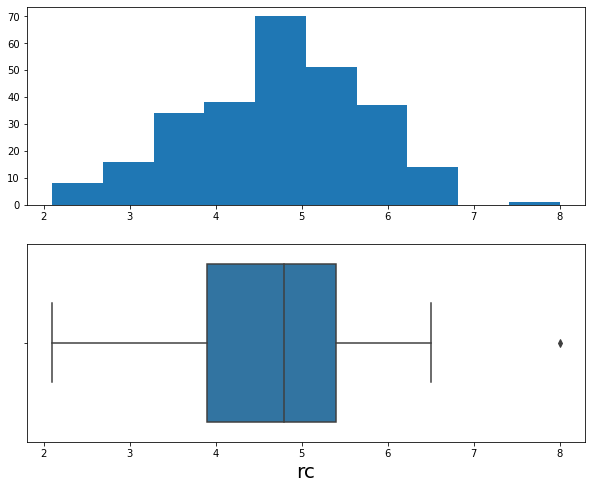

In [68]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.hist(df['rc'])
plt.subplot(2,1,2)
plt.xlabel('',size=20)
sns.boxplot(x='rc', data=df)
plt.show()

In [69]:
rcq1 = df['rc'].quantile(0.25)
rcq3 = df['rc'].quantile(0.75)
rciqr = rcq3-rcq1
rclowerlimit = rcq1-(1.5*rciqr)
rcupperlimit = rcq3+(1.5*rciqr)
df['rc'] = np.where(df['rc']<rclowerlimit,rclowerlimit,np.where(df['rc']>rcupperlimit,rcupperlimit,df['rc']))

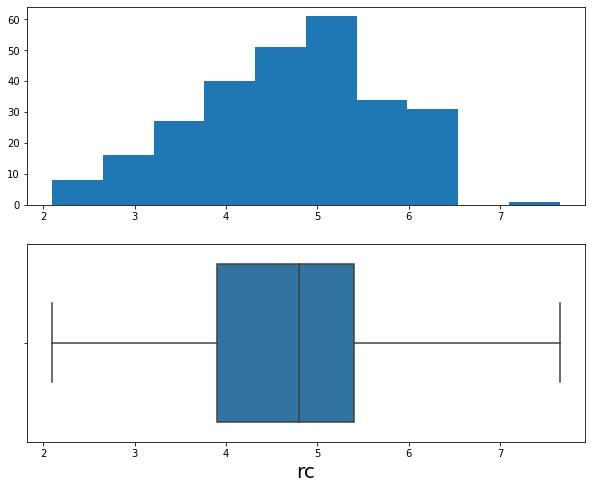

In [70]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.hist(df['rc'])
plt.subplot(2,1,2)
plt.xlabel('',size=20)
sns.boxplot(x='rc', data=df)
plt.show()

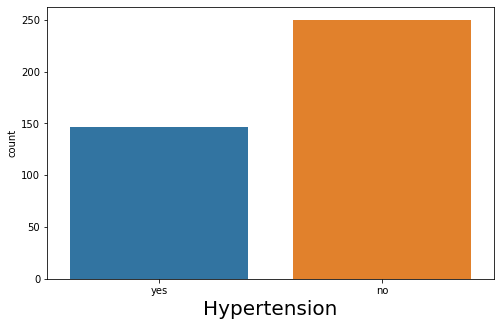

In [71]:
plt.figure(figsize=(8,5))
sns.countplot(df['htn'])
plt.xlabel('Hypertension',size=20)
plt.show()

In [72]:
df['dm'].value_counts()

no       257
yes      134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64

In [73]:
df['dm'].replace(to_replace=['\tno','\tyes',' yes'],value=['no','yes','yes'],inplace=True)

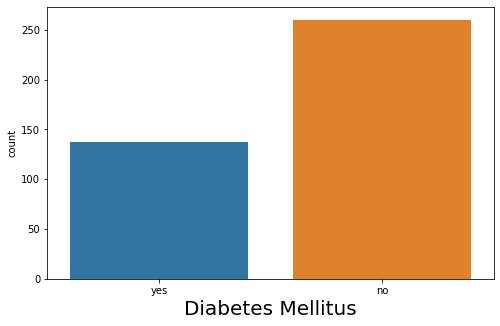

In [74]:
plt.figure(figsize=(8,5))
sns.countplot(df['dm'])
plt.xlabel('Diabetes Mellitus',size=20)
plt.show()

In [75]:
df['cad'].value_counts()

no      361
yes      34
\tno      2
Name: cad, dtype: int64

In [76]:
df['cad'].replace(to_replace='\tno',value='no',inplace=True)

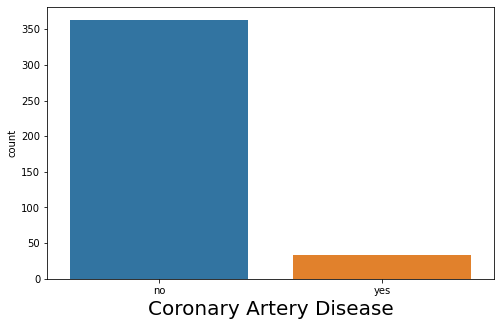

In [77]:
plt.figure(figsize=(8,5))
sns.countplot(df['cad'])
plt.xlabel('Coronary Artery Disease',size=20)
plt.show()

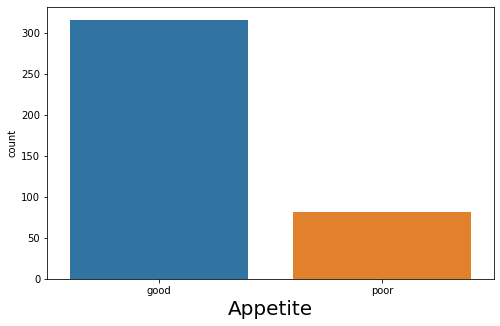

In [78]:
plt.figure(figsize=(8,5))
sns.countplot(df['appet'])
plt.xlabel('Appetite',size=20)
plt.show()

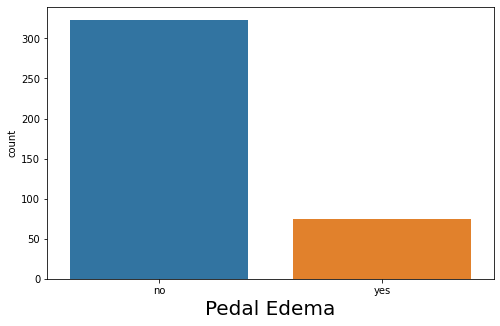

In [79]:
plt.figure(figsize=(8,5))
sns.countplot(df['pe'])
plt.xlabel('Pedal Edema',size=20)
plt.show()

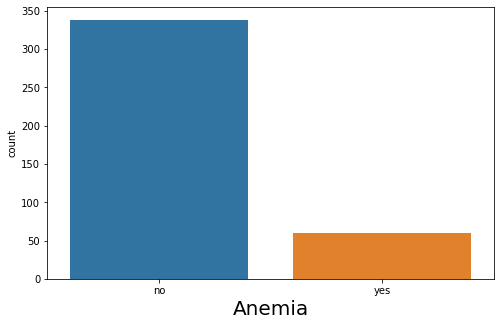

In [80]:
plt.figure(figsize=(8,5))
sns.countplot(df['ane'])
plt.xlabel('Anemia',size=20)
plt.show()

### Observation:
From above univariate analysis we can see that, there are few outliers in age, bp, etc, proportional count of records for categorical data and distributions of features.

## Bivariate Analysis:

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             390 non-null    float64
 1   bp              387 non-null    float64
 2   sg              352 non-null    float64
 3   al              353 non-null    float64
 4   su              350 non-null    float64
 5   rbc             247 non-null    object 
 6   pc              334 non-null    object 
 7   pcc             395 non-null    object 
 8   ba              395 non-null    object 
 9   bgr             355 non-null    float64
 10  bu              380 non-null    float64
 11  sc              382 non-null    float64
 12  sod             312 non-null    float64
 13  pot             311 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             329 non-null    float64
 16  wc              294 non-null    float64
 17  rc              269 non-null    flo

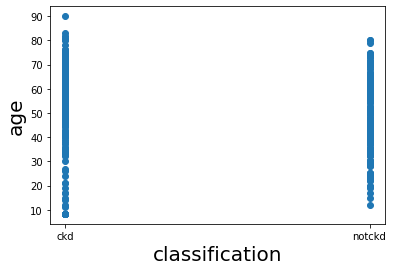

In [82]:
plt.scatter(df['classification'],df['age'])
plt.xlabel('classification',size=20)
plt.ylabel('age',size=20)
plt.show()

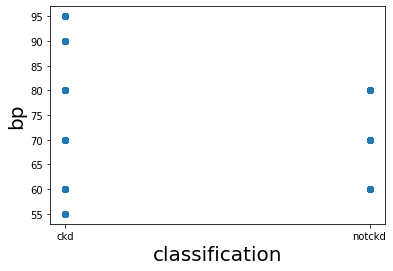

In [83]:
plt.scatter(df['classification'],df['bp'])
plt.xlabel('classification',size=20)
plt.ylabel('bp',size=20)
plt.show()

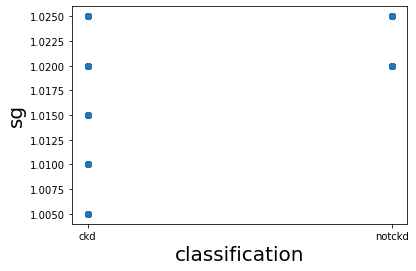

In [84]:
plt.scatter(df['classification'],df['sg'])
plt.xlabel('classification',size=20)
plt.ylabel('sg',size=20)
plt.show()

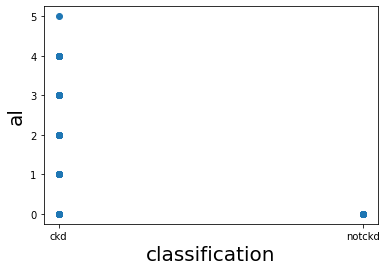

In [85]:
plt.scatter(df['classification'],df['al'])
plt.xlabel('classification',size=20)
plt.ylabel('al',size=20)
plt.show()

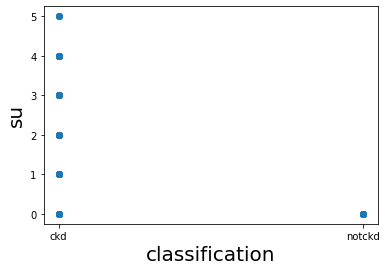

In [86]:
plt.scatter(df['classification'],df['su'])
plt.xlabel('classification',size=20)
plt.ylabel('su',size=20)
plt.show()

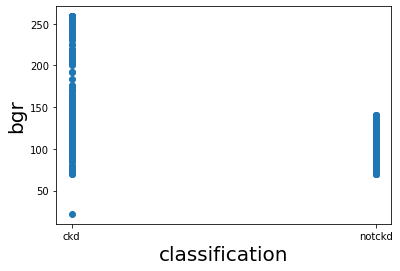

In [87]:
plt.scatter(df['classification'],df['bgr'])
plt.xlabel('classification',size=20)
plt.ylabel('bgr',size=20)
plt.show()

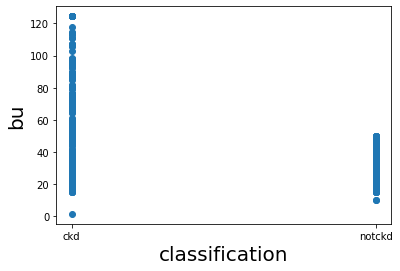

In [88]:
plt.scatter(df['classification'],df['bu'])
plt.xlabel('classification',size=20)
plt.ylabel('bu',size=20)
plt.show()

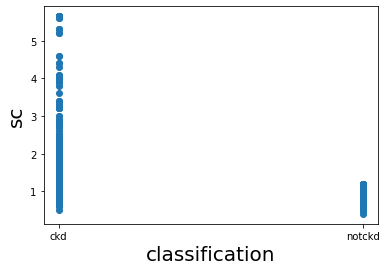

In [89]:
plt.scatter(df['classification'],df['sc'])
plt.xlabel('classification',size=20)
plt.ylabel('sc',size=20)
plt.show()

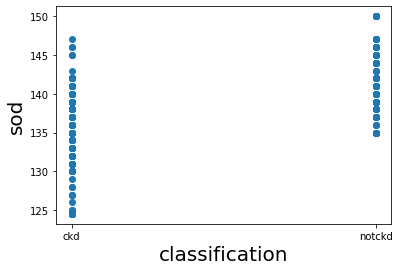

In [90]:
plt.scatter(df['classification'],df['sod'])
plt.xlabel('classification',size=20)
plt.ylabel('sod',size=20)
plt.show()

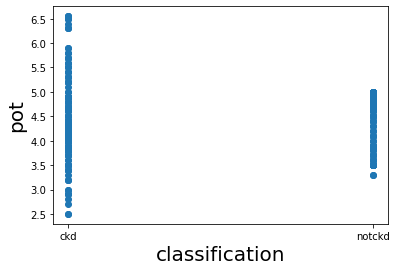

In [91]:
plt.scatter(df['classification'],df['pot'])
plt.xlabel('classification',size=20)
plt.ylabel('pot',size=20)
plt.show()

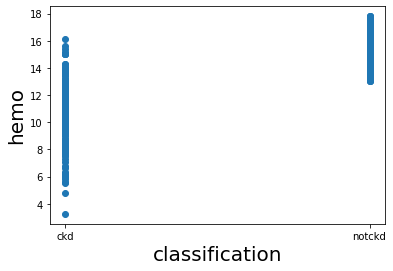

In [92]:
plt.scatter(df['classification'],df['hemo'])
plt.xlabel('classification',size=20)
plt.ylabel('hemo',size=20)
plt.show()

### Observation: 

## Multivariate anaylsis:

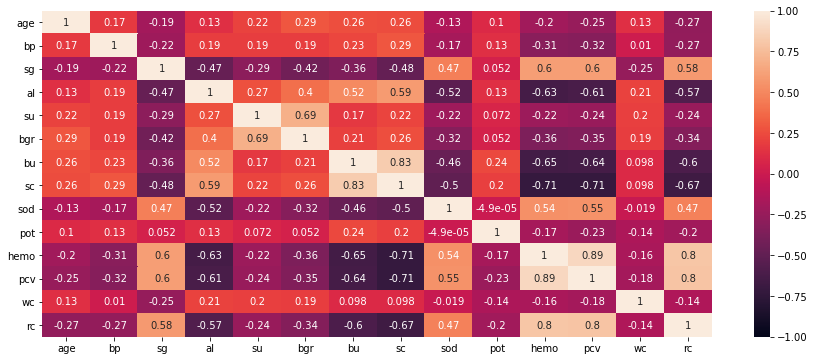

In [93]:
corr_df = df.corr()
fig, ax = plt.subplots(figsize=(15,6))
sns.heatmap(corr_df,vmin=-1, vmax=1,annot=True);

### Observations :
From above heatmap we can see that Hemoglobin(hemo) and Packed cell volume(pcv) and Red BloodCell(rc) are very highly correlated with each other,also Blood Urea(bu) and Serum Creatinine(sc) are highly correlated, whereas Serum Creatinine(sc) is inversly correlated with Hemoglobin(hemo),Packed cell volume(pcv) and Red BloodCell(rc).

# Feature Engineering:
From above exploratory data analysis we found out that we need to handle missing values, handle outliers and to encode categorical features, dataset is pretty much balanced for classification i.e, approx 60% - 40% ratio. We need to eliminate certain features eg Red Blood Cell(rc) and Packed cell volume(pcv) which are highly correlated with hemo.

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             390 non-null    float64
 1   bp              387 non-null    float64
 2   sg              352 non-null    float64
 3   al              353 non-null    float64
 4   su              350 non-null    float64
 5   rbc             247 non-null    object 
 6   pc              334 non-null    object 
 7   pcc             395 non-null    object 
 8   ba              395 non-null    object 
 9   bgr             355 non-null    float64
 10  bu              380 non-null    float64
 11  sc              382 non-null    float64
 12  sod             312 non-null    float64
 13  pot             311 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             329 non-null    float64
 16  wc              294 non-null    float64
 17  rc              269 non-null    flo

In [95]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
count,390.000000,387.000000,352.000000,353.000000,350.000000,355.000000,380.000000,382.00000,312.000000,311.000000,348.000000,329.000000,294.000000,269.000000
mean,51.511538,75.684755,1.017429,1.016997,0.442857,139.853521,51.572895,2.12212,138.161859,4.383119,12.526868,38.895137,8295.578231,4.706134
std,16.992859,11.127329,0.005711,1.354599,1.092246,57.161837,33.083741,1.70354,6.103759,0.752220,2.911198,8.956642,2545.168247,1.021344
min,8.250000,55.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.40000,124.500000,2.500000,3.250000,12.500000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.90000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,54.500000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.30000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.000000,80.000000,1.020000,2.000000,0.000000,162.500000,66.000000,2.80000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,95.000000,1.025000,5.000000,5.000000,259.000000,124.500000,5.65000,150.000000,6.550000,17.800000,54.000000,14750.000000,7.650000


In [96]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.00,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,8.25,55.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.00,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,259.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.00,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.00,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.00,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.00,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.00,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.00,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [97]:
x = df.iloc[:,:24]
y = df['classification']

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=32)

In [99]:
df_train = pd.concat([x_train,y_train],axis=1)
df_test = pd.concat([x_test,y_test],axis=1)

In [136]:
numeric_features = ["age", "bp","sg","al","su","bgr","bu","sod","pot","hemo","wc"]
numeric_transformer = Pipeline(
    steps=[("imputer", KNNImputer(n_neighbors=5,weights='uniform',metric='nan_euclidean')),
           ("scaler", StandardScaler())]
)

In [137]:
categorical_features = ["rbc", "pc", "pcc","ba","htn","dm","cad","appet","pe","ane"]
categorical_transformer = Pipeline(
    steps=[("encoder",OneHotEncoder(handle_unknown='ignore',sparse=False)),
           ("imputer", KNNImputer(n_neighbors=5,weights='uniform',metric='nan_euclidean'))]
)

In [138]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [139]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu',
                                  'sod', 'pot', 'hemo', 'wc']),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False)),
                                                 ('imputer', KNNImputer())]),
                                 ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad',
                                  'appet', 'pe', 'ane'])])

# Modelling:

In [140]:
svc_model = SVC(kernel='linear', class_weight='balanced')
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
gnb_model = GaussianNB()
logreg_model = LogisticRegression()
dtc_model = DecisionTreeClassifier()
rfc_model = RandomForestClassifier()

In [141]:
repository = [logreg_model,svc_model,knn_model,gnb_model,dtc_model,rfc_model]

In [142]:
for model in repository:
    clf = Pipeline( 
        steps=[("preprocessor", preprocessor),
               ("classifier", model)])

    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(f'Model: {model}')
    print(f'Accuracy: {accuracy_score(y_pred,y_test)*100}')
    print(f'Confusion Matrix: \n{confusion_matrix(y_pred,y_test)}')
    print(f'Classification Report: \n{classification_report(y_pred,y_test)}')

Model: LogisticRegression()
Accuracy: 100.0
Confusion Matrix: 
[[49  0]
 [ 0 31]]
Classification Report: 
              precision    recall  f1-score   support

         ckd       1.00      1.00      1.00        49
      notckd       1.00      1.00      1.00        31

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Model: SVC(class_weight='balanced', kernel='linear')
Accuracy: 100.0
Confusion Matrix: 
[[49  0]
 [ 0 31]]
Classification Report: 
              precision    recall  f1-score   support

         ckd       1.00      1.00      1.00        49
      notckd       1.00      1.00      1.00        31

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Model: KNeighborsClassifier()
Accuracy: 97.5
Confusion Matrix: 
[[47  0]
 [ 2 31]]
Classification Report: 
  

# Conclusion / Results:
We have developed a general model according to the available data points. Our main concern was to predict people with CKD correctly so that early treatment can be given to them to stop CKD developing into more advanced stages where dialysis will be needed for their survival. We choose specificity as our performance metric for this binary classification problem. Data points are very less and in that too much of the data from features is missing. For future improvements & retraining of this model, we can ask for more non-missing data.